# Environment Setup

In [12]:
# install hyperopts for parameter optimization
!pip install hyperopt
!pip install unidecode

     |████████████████████████████████| 245kB 7.2MB/s 


# Data Preperation

In [4]:
# download CIC-IDS2017 Dataset
# insert the download link
!wget *DOWNLOAD LINK*

--2021-01-03 12:11:29--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  4.37MB/s    in 2m 20s  

2021-01-03 12:13:50 (1.61 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]



In [5]:
!unzip MachineLearningCSV.zip

Archive:  MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [4]:
#Imports
import pandas as pd
import numpy as np
import numpy as np
import os 

In [5]:
#read in all the csv files

base_dir = "MachineLearningCVE"

csv_files = os.listdir(base_dir)

data = pd.DataFrame()

for file in csv_files:
  print("Read in {}".format(file))
  data = data.append((pd.read_csv(os.path.join(base_dir, file))))

print("Finisehd reading in {} entires".format(str(data.shape[0])))

FileNotFoundError: ignored

In [ ]:
from unidecode import unidecode
data[" Label"] = data[" Label"].apply(unidecode)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

In [4]:
data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
data[" Label"].value_counts()

BENIGN                       2273097
DoS Hulk                      231073
PortScan                      158930
DDoS                          128027
DoS GoldenEye                  10293
FTP-Patator                     7938
SSH-Patator                     5897
DoS slowloris                   5796
DoS Slowhttptest                5499
Bot                             1966
Web Attack  Brute Force         1507
Web Attack  XSS                  652
Infiltration                      36
Web Attack  Sql Injection         21
Heartbleed                        11
Name:  Label, dtype: int64

In [15]:
data[" Label"].value_counts(normalize=True)

BENIGN                       0.803004
DoS Hulk                     0.081630
PortScan                     0.056144
DDoS                         0.045227
DoS GoldenEye                0.003636
FTP-Patator                  0.002804
SSH-Patator                  0.002083
DoS slowloris                0.002048
DoS Slowhttptest             0.001943
Bot                          0.000695
Web Attack  Brute Force      0.000532
Web Attack  XSS              0.000230
Infiltration                 0.000013
Web Attack  Sql Injection    0.000007
Heartbleed                   0.000004
Name:  Label, dtype: float64

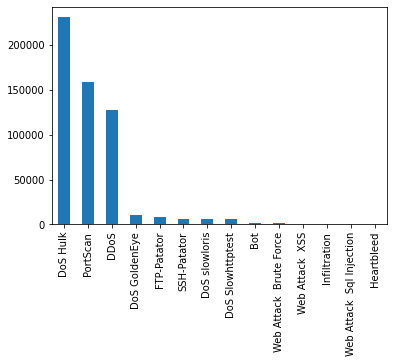

In [16]:
#@title Standardtext für Titel
data[data[" Label"] != "BENIGN"][" Label"].value_counts().plot(kind='bar')

In [28]:
np.unique(data[' Label'])

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � Sql Injection',
       'Web Attack � XSS'], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean[' Label'] = labelencoder.fit_transform(data_clean[' Label'])

data_np = data_clean.to_numpy(dtype="float32")

#drop inf values
data_np = data_np[~np.isinf(data_np).any(axis=1)]

X = data_np[:, 0:78]

enc = OneHotEncoder()


Y = enc.fit_transform(data_np[:,79:]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

# Model Training

In [2]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 73, 128)           896       
_________________________________________________________________
activation_6 (Activation)    (None, 73, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 68, 256)           196864    
_________________________________________________________________
activation_7 (Activation)    (None, 68, 256)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 17408)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 256)               4456704   
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

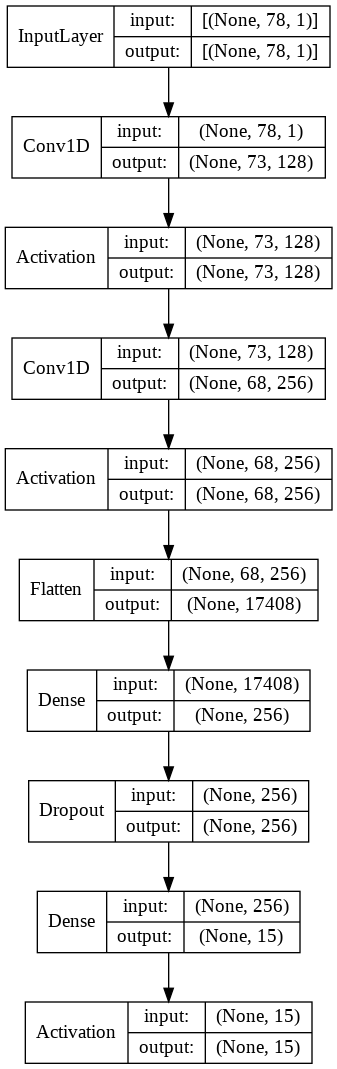

In [11]:
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(78, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15))
model.add(Activation('softmax'))
model.summary() 

tf.keras.utils.plot_model(
    model,
        show_shapes=True,
    show_dtype=False,
      show_layer_names=False,
)

## 3NN Dense Model

In [15]:


K = keras.backend

nn_history = {}

def train_dynamic_model(args):
    print('\nRun') 
    print('==========')
    print('Parameters:\n{}'.format(args))
    
    batch_size = int(args['batch_size'])
    dropout_rate = args['dropout_rate']
    model_name = '3NN-models/{}.h5'.format(uuid.uuid4()) 
    opt_name = args['optimizer']['name']

        
    K.clear_session()
    gc.collect()

 

    # Simple 3 Layer Dense Model
    model = Sequential()
    model.add(Dense(128, input_dim=_features, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.summary() 

    model.compile(loss='categorical_crossentropy',optimizer=opt_name ,metrics=['accuracy'])

    early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
    hist = model.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])
    
    nn_history[model_name] = hist.history
    
    y_pred = model.predict_classes(X_test)
    balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
    best_loss = np.amin(hist.history['val_loss']) 
    print('Best loss: {}'.format(best_loss))
    print('Model: {}'.format(model_name))
    print('Balanced Acc loss: {}'.format(balanced_score))
    
    return {
        'loss': best_loss,
        'status': STATUS_OK,
        'model_name': model_name
    }

In [16]:
args = {
    'batch_size': 500,
    'dropout_rate': 0.1,
    'optimizer':
        {
            'name': 'adam',
        }
}
train_dynamic_model(args)


Run
Parameters:
{'batch_size': 500, 'dropout_rate': 0.1, 'optimizer': {'name': 'adam'}}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10112     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                1935      
_________________________________________________________________
activation (Activation)      (None, 15)                0         
Total params: 45,071
Trainable pa

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Best loss: 0.009125507436692715
Model: 3NN-models/d636fb5f-13a5-4147-b705-1299734b2b5a.h5
Balanced Acc loss: 75.63357293107093


{'loss': 0.009125507436692715,
 'model_name': '3NN-models/d636fb5f-13a5-4147-b705-1299734b2b5a.h5',
 'status': 'ok'}

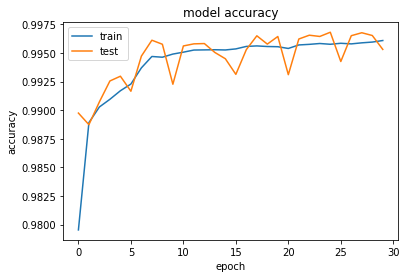

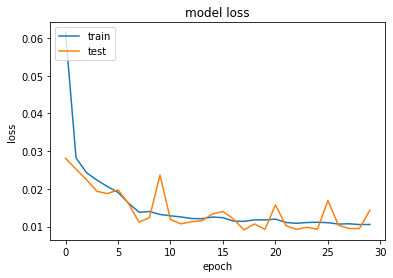

In [25]:
import matplotlib.pyplot as plt

plt.plot(nn_history["3NN-models/d636fb5f-13a5-4147-b705-1299734b2b5a.h5"]['accuracy'])
plt.plot(nn_history["3NN-models/d636fb5f-13a5-4147-b705-1299734b2b5a.h5"]['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(nn_history["3NN-models/d636fb5f-13a5-4147-b705-1299734b2b5a.h5"]['loss'])
plt.plot(nn_history["3NN-models/d636fb5f-13a5-4147-b705-1299734b2b5a.h5"]['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(np.unique(data[' Label']), y_pred))
print('Classification Report')
target_names = np.unique(data[' Label'])
print(classification_report(np.unique(data[' Label']), y_pred, target_names=target_names))

NameError: ignored

In [11]:

trials = Trials()

space = {  
    'batch_size': hp.choice('batch_size', [500, 1000, 5000, 20000]),
    'dropout_rate': hp.choice('dropout_rate', [0, 0.3]),
    'optimizer': hp.choice('optimizer', [
        {
            'name': 'sgd',
        }, 
        {
            'name': 'adam',
        }
    ])
}


best_run = fmin(fn=train_dynamic_model,
                space=space,
                algo=tpe.suggest,
                max_evals=16,
                trials=trials)


Run
Parameters:
{'batch_size': 20000, 'dropout_rate': 0, 'optimizer': {'name': 'adam'}}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10112     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                1935      
_________________________________________________________________
activation (Activation)      (None, 15)                0         
Total params: 45,071
Trainable pa

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Best loss: 0.024405643343925476
Model: 3NN-models/7a2bada7-c30b-4dbd-ba54-a9a42a690b6c.h5
Balanced Acc loss: 62.47370037438616

Run
Parameters:
{'batch_size': 1000, 'dropout_rate': 0, 'optimizer': {'name': 'sgd'}}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               10112     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                1935      
________________________________________

KeyboardInterrupt: ignored

# 2CNN Model

In [17]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras

K = keras.backend

X_train = X_train.reshape(X_train.shape[0], 78, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 78, 1).astype('float32')

cnn_history = {}

def train_dynamic_model(args):
    print('\nRun') 
    print('==========')
    print('Parameters:\n{}'.format(args))
    
    batch_size = int(args['batch_size'])
    dropout_rate = args['dropout_rate']
    model_name = 'CNN-models/{}.h5'.format(uuid.uuid4()) 
    opt_name = args['optimizer']['name']

        
    K.clear_session()
    gc.collect()

 

    # CNN Model
    model = Sequential()
    model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
    model.add(Activation('relu'))
    model.add(Convolution1D(filters=256, kernel_size=6))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.summary() 

    model.compile(loss='categorical_crossentropy',optimizer=opt_name ,metrics=['accuracy'])

    early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.001)
    
    hist = model.fit(X_train, Y_train,
                              batch_size=batch_size,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])
    
    cnn_history[model_name] = hist.history
    
    y_pred = model.predict_classes(X_test)
    balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
    best_loss = np.amin(hist.history['val_loss']) 
    print('Best loss: {}'.format(best_loss))
    print('Model: {}'.format(model_name))
    print('Balanced Acc loss: {}'.format(balanced_score))
    
    return {
        'loss': 100 - balanced_score,
        'status': STATUS_OK,
        'model_name': model_name
    }

In [18]:
args = {
    'batch_size': 500,
    'dropout_rate': 0.1,
    'optimizer':
        {
            'name': 'adam',
        }
}
train_dynamic_model(args)


Run
Parameters:
{'batch_size': 500, 'dropout_rate': 0.1, 'optimizer': {'name': 'adam'}}
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 73, 128)           896       
_________________________________________________________________
activation (Activation)      (None, 73, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 68, 256)           196864    
_________________________________________________________________
activation_1 (Activation)    (None, 68, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 17408)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4456704   
_________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Best loss: 0.0060426280833780766
Model: CNN-models/0c72f65c-b3e7-493e-9625-42de6243a416.h5
Balanced Acc loss: 86.18362650228207


{'loss': 13.816373497717933,
 'model_name': 'CNN-models/0c72f65c-b3e7-493e-9625-42de6243a416.h5',
 'status': 'ok'}

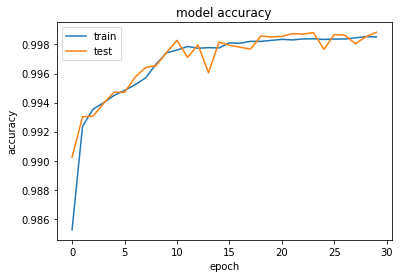

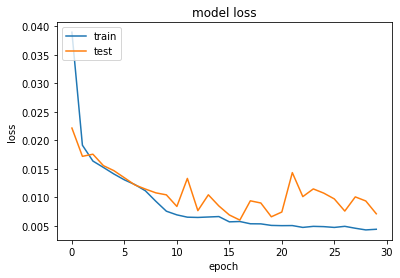

In [21]:
import matplotlib.pyplot as plt

plt.plot(cnn_history["CNN-models/0c72f65c-b3e7-493e-9625-42de6243a416.h5"]['accuracy'])
plt.plot(cnn_history["CNN-models/0c72f65c-b3e7-493e-9625-42de6243a416.h5"]['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_history["CNN-models/0c72f65c-b3e7-493e-9625-42de6243a416.h5"]['loss'])
plt.plot(cnn_history["CNN-models/0c72f65c-b3e7-493e-9625-42de6243a416.h5"]['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
k
trials = Trials()

space = {  
    'batch_size': hp.choice('batch_size', [500, 1000, 5000, 20000]),
    'dropout_rate': hp.choice('dropout_rate', [0, 0.3]),
    'optimizer': hp.choice('optimizer', [
        {
            'name': 'sgd',
        }, 
        {
            'name': 'adam',
        }
    ])
}


best_run = fmin(fn=train_dynamic_model,
                space=space,
                algo=tpe.suggest,
                max_evals=16,
                trials=trials)